In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score,f1_score,recall_score,roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [22]:
df = pd.read_csv('C:\\Users\\sravy\\Desktop\\ml lab\\covid(For Naive Bayes Program).csv')
df.head()

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False


In [23]:
encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == object or df[column].dtype == bool:
        df[column] = encoder.fit_transform(df[column])

In [24]:
x = df.iloc[:,:-1]
y= df.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
classifier = CategoricalNB()
classifier.fit(x_train,y_train)

CategoricalNB()

In [26]:
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print("accuracy :"+str(accuracy))
print("recall : "+str(recall))
print("F1 score : "+str(f1))

accuracy :0.8
recall : 0.75
F1 score : 0.8571428571428571


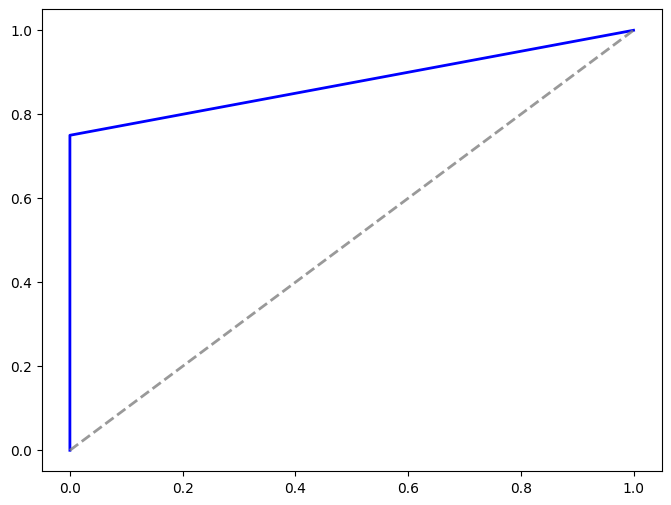

In [27]:
fpr,tpr,threshold = roc_curve(y_test,y_pred)

roc_auc = roc_auc_score(y_test,y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color='blue',lw=2,label=f'roc curve(ROC_AUC = {roc_auc : .2f})')
plt.plot([0,1],[0,1],linestyle='--',color='gray',lw=2,label='random',alpha=0.8)
plt.show()